In [1]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
from transform_factory import get_spatial_transform, center_crop_224, center_crop_11

In [2]:
T_spatial, T_inv_spatial = get_spatial_transform()

In [36]:
img = torch.randn(1, 2048, 11, 11)

# upsampled = F.interpolate(img, (322, 322), mode ='bilinear')
reduced = torch.sum(img, axis = 1).unsqueeze(0)

# print(upsampled.shape, reduced.shape)

In [38]:
# upsample -> rotate
upsampled = F.interpolate(reduced, (322, 322), mode='bilinear')
upsampled_rotated = T_spatial(upsampled)
true_map = center_crop_224(upsampled_rotated)

upsampled_rotated_downsampled = F.interpolate(upsampled_rotated, (11, 11), mode="bilinear")

In [51]:
print(true_map)
print(F.interpolate(F.interpolate(true_map, (11, 11), mode="bilinear"), (224, 224), mode="bilinear"))

tensor([[[[ 38.9251,  36.8142,  34.7032,  ..., -12.2078, -12.2078, -12.0071],
          [ 41.0361,  38.9251,  36.8142,  ..., -12.0071, -12.0071, -11.8063],
          [ 41.0361,  38.9251,  36.8142,  ..., -11.8063, -11.8063, -11.6056],
          ...,
          [ 37.1766,  38.5226,  38.5226,  ...,  22.2967,  21.9205,  21.5443],
          [ 38.5226,  39.8686,  39.8686,  ...,  22.2967,  21.9205,  21.5443],
          [ 39.8686,  41.2146,  41.2146,  ...,  22.6729,  22.2967,  21.9205]]]])
tensor([[[[28.9592, 28.9592, 28.9592,  ..., -7.6730, -7.6730, -7.6730],
          [28.9592, 28.9592, 28.9592,  ..., -7.6730, -7.6730, -7.6730],
          [28.9592, 28.9592, 28.9592,  ..., -7.6730, -7.6730, -7.6730],
          ...,
          [ 9.2562,  9.2562,  9.2562,  ..., 23.1911, 23.1911, 23.1911],
          [ 9.2562,  9.2562,  9.2562,  ..., 23.1911, 23.1911, 23.1911],
          [ 9.2562,  9.2562,  9.2562,  ..., 23.1911, 23.1911, 23.1911]]]])


In [47]:
sudo_upsampled = F.interpolate(reduced, (322, 322), mode='bilinear')
sudo_upsampled = T_spatial(sudo_upsampled)
pred = center_crop_224(sudo_upsampled)
# pred = F.interpolate(pred, (224, 224), mode='bilinear')

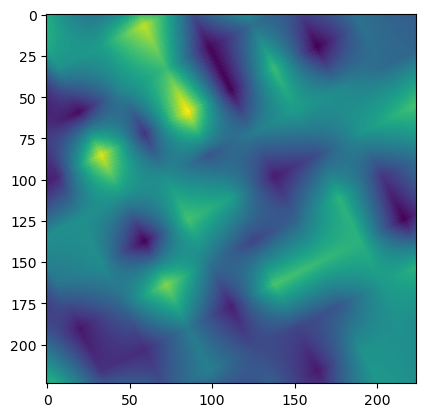

In [48]:
plt.imshow(pred.squeeze())

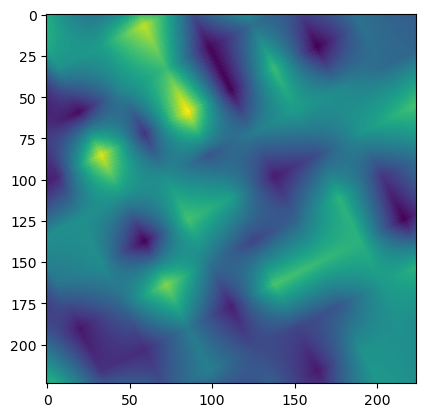

In [46]:
plt.imshow(true_map.squeeze())

In [29]:
torch.mean(torch.abs(upsampled_rotated - urdu))

tensor(5.1184)